In [1]:
import  pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("D:\ml\Default_Fin.csv")


E:\annakonda\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


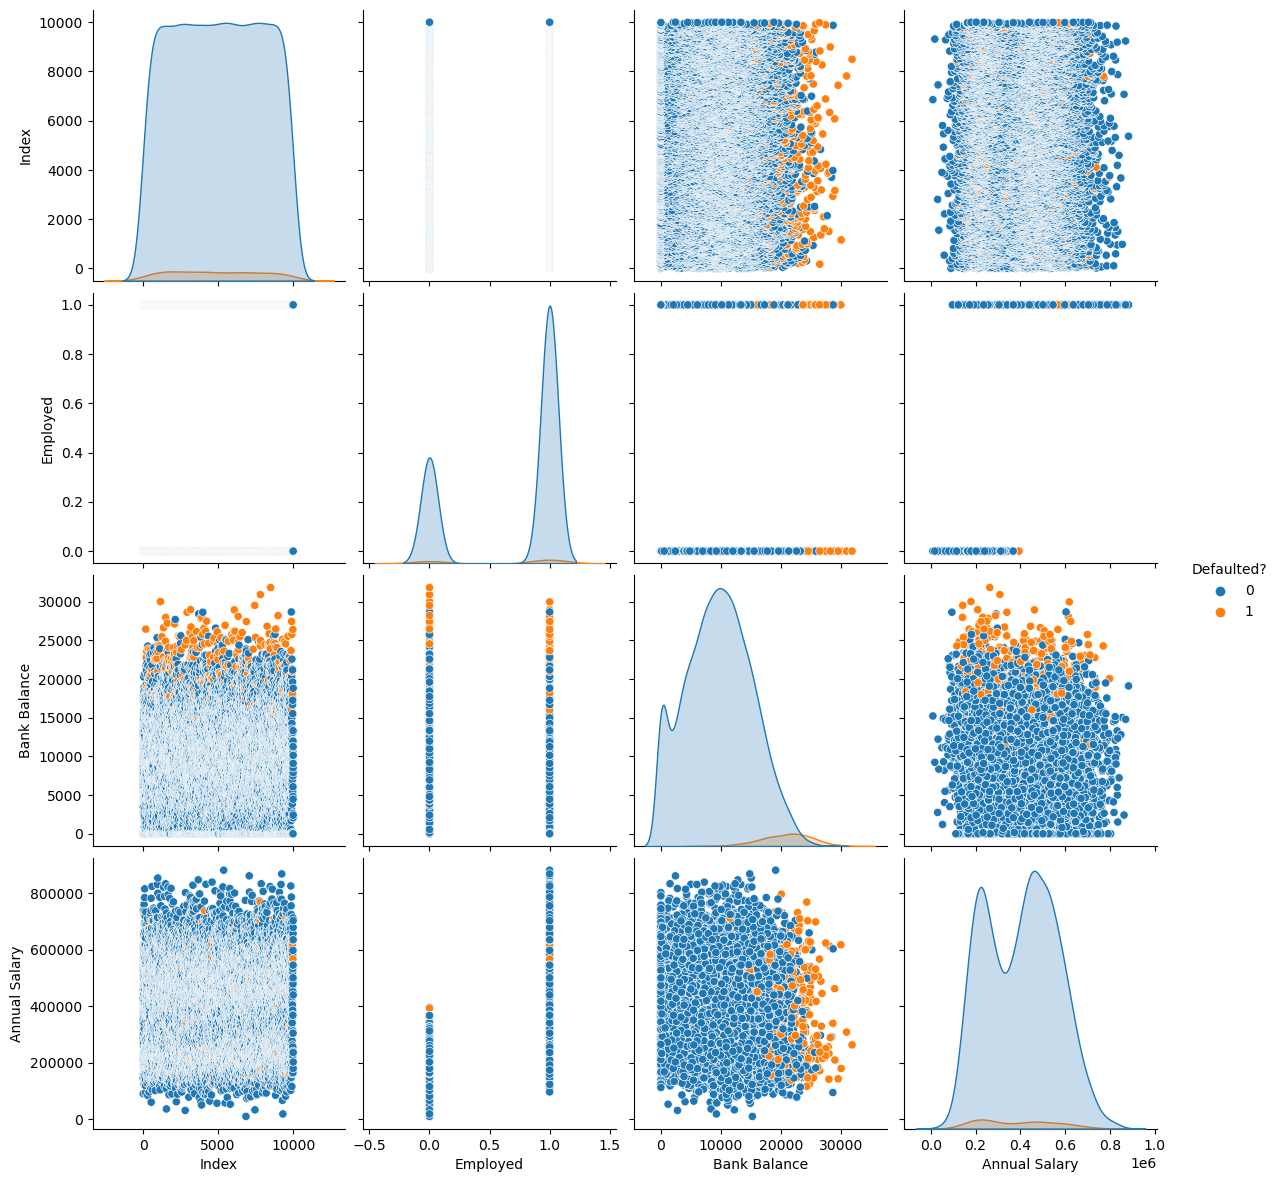

In [4]:
sns.pairplot(data,hue='Defaulted?',size=3)

In [9]:
data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


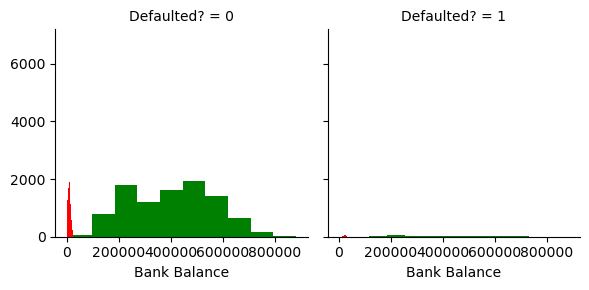

In [9]:
plot=sns.FacetGrid(data,col="Defaulted?",margin_titles=True)
plot.map(plt.hist,'Annual Salary',color='green')
plot.map(plt.hist,'Employed',color='blue')
plot.map(plt.hist,'Bank Balance',color='red')


(array([  5.,  16.,  65., 268., 529., 778., 793., 611., 489., 462., 559.,
        716., 828., 779., 778., 664., 573., 427., 278., 182., 101.,  49.,
         28.,  17.,   5.]),
 array([  9263.64  ,  44199.1248,  79134.6096, 114070.0944, 149005.5792,
        183941.064 , 218876.5488, 253812.0336, 288747.5184, 323683.0032,
        358618.488 , 393553.9728, 428489.4576, 463424.9424, 498360.4272,
        533295.912 , 568231.3968, 603166.8816, 638102.3664, 673037.8512,
        707973.336 , 742908.8208, 777844.3056, 812779.7904, 847715.2752,
        882650.76  ]),
 <BarContainer object of 25 artists>)

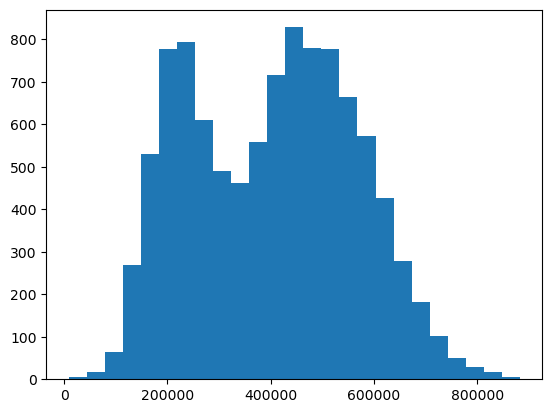

In [16]:
plt.hist(data['Annual Salary'],bins=25)

(array([774., 339., 469., 585., 649., 751., 787., 857., 827., 797., 677.,
        628., 507., 394., 303., 209., 168., 116.,  65.,  46.,  28.,  11.,
          8.,   3.,   2.]),
 array([    0.    ,  1274.0736,  2548.1472,  3822.2208,  5096.2944,
         6370.368 ,  7644.4416,  8918.5152, 10192.5888, 11466.6624,
        12740.736 , 14014.8096, 15288.8832, 16562.9568, 17837.0304,
        19111.104 , 20385.1776, 21659.2512, 22933.3248, 24207.3984,
        25481.472 , 26755.5456, 28029.6192, 29303.6928, 30577.7664,
        31851.84  ]),
 <BarContainer object of 25 artists>)

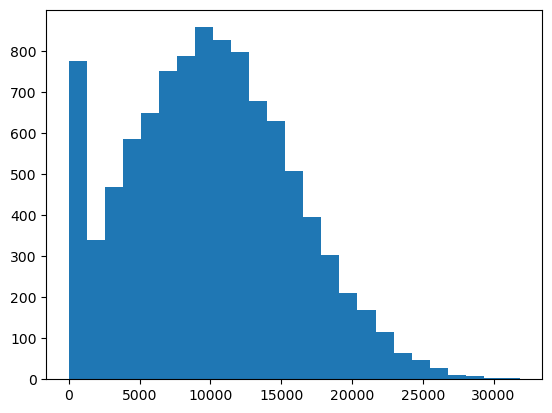

In [17]:
plt.hist(data['Bank Balance'],bins=25)

In [10]:
data.tail()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0
9999,10000,0,2411.04,202355.40,0


C:\Users\susha\AppData\Local\Temp\ipykernel_1272\2439972358.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,bins=20)


<Axes: ylabel='Density'>

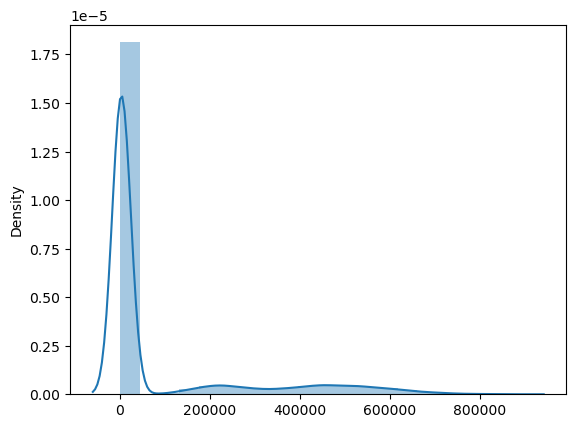

In [18]:
sns.distplot(data,bins=20)


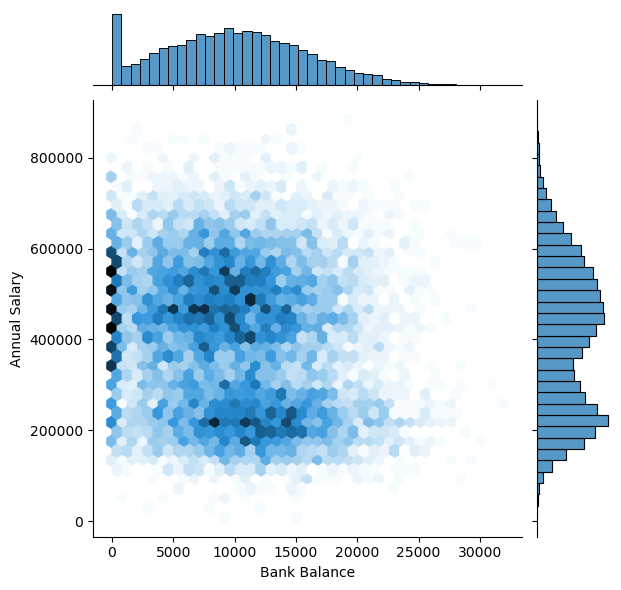

In [14]:
sns.jointplot(x=data['Bank Balance'],y=data['Annual Salary'],kind='hex')

In [38]:
x=data.iloc[:,[1,2,3]]
y=data.iloc[:,4]

In [55]:
x
x.describe()

,Employed,Bank Balance,Annual Salary
count,10000.000000,10000.000000,10000.000000
mean,0.705600,10024.498524,402203.782224
std,0.455795,5804.579486,160039.674988
min,0.000000,0.000000,9263.640000
25%,0.000000,5780.790000,256085.520000
50%,1.000000,9883.620000,414631.740000
75%,1.000000,13995.660000,525692.760000
max,1.000000,31851.840000,882650.760000


In [40]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Defaulted?, Length: 10000, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
x_test


,Employed,Bank Balance,Annual Salary
9394,0,0.00,166937.28
898,1,4763.88,665455.56
2398,1,12557.04,571179.72
5906,1,10036.08,414709.92
2343,0,6416.28,224754.84
...,...,...,...
8764,1,12868.56,239502.48
4359,0,8698.80,199717.56
2041,1,9073.92,633336.60
1108,0,6147.84,299395.44


In [42]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy')
classifier.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [44]:
y_predict=classifier.predict(x_test)

In [45]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

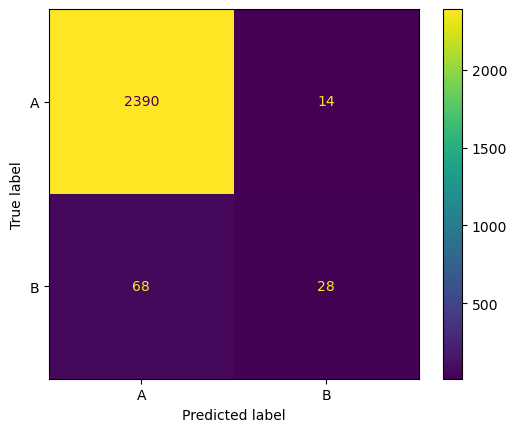

In [51]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_predict)
eff=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=['A','B'])
eff.plot()
plt.show()

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test and y_predict are defined somewhere in your code

accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9672
Precision: 0.9605975589910497
Recall: 0.9672
F1 Score: 0.9609647559601524


In [63]:
user_input = {
    'Employed': int(input("if Employed:1,if not Employed:0 ")),
    'Bank Balance': float(input("Enter balance: ")),
    'Annual Salary': float(input("Enter Annual Salary: "))
    
}
user_df = pd.DataFrame([user_input])
prediction = classifier.predict(user_df)

# Display the prediction
print("Predicted class for the user input:", prediction[0])


if Employed:1,if not Employed:0 1
Enter balance: 5000
Enter Annual Salary: 8850000
Predicted class for the user input: 0
